   value
0   64.8
1   71.4
2   72.2
3   87.8
4   74.8


<Axes: >

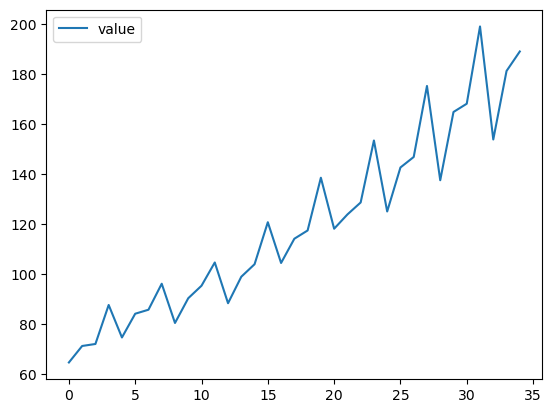

In [1]:
# видно, что не стационарный и с сезонным лагом = 4, следовательно p = 4
import pandas as pd
df = pd.read_csv('sample_wo.csv', names=['value'], header=0)
print(df.head())
df.plot()

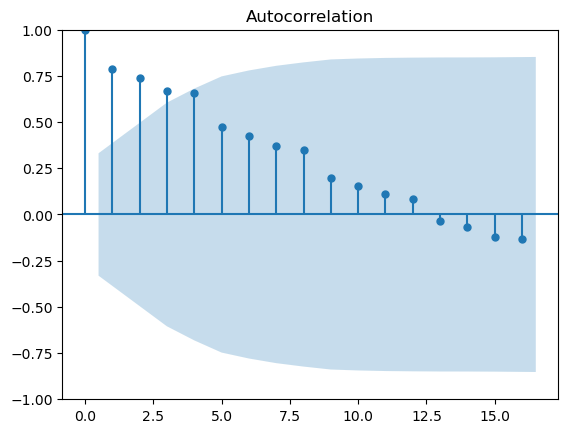

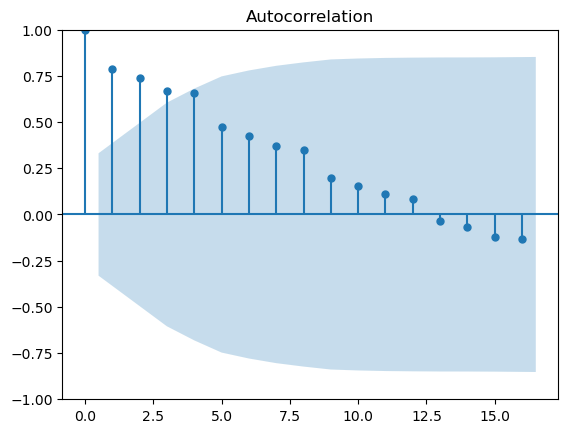

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.value)

<function matplotlib.pyplot.show(close=None, block=None)>

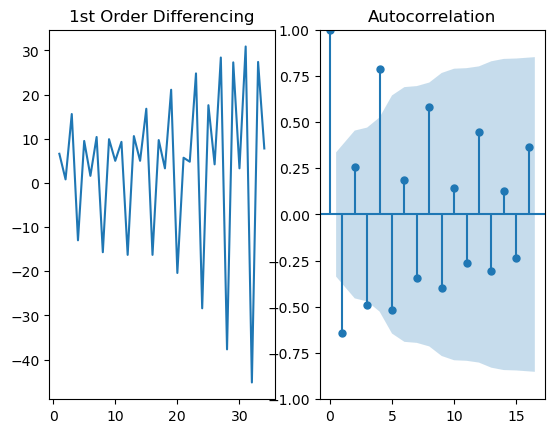

In [3]:
# q = 1, возьмем меньший из 1 или 4
import matplotlib.pyplot as plt
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(), ax = ax2 )
plt.show

In [4]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.9990257349538867
p-value:  0.4011960695579423
p-value:  0.01486007794604307
p-value:  6.3394128968090876e-06
p-value:  1.5761599505706312e-05


<function matplotlib.pyplot.show(close=None, block=None)>

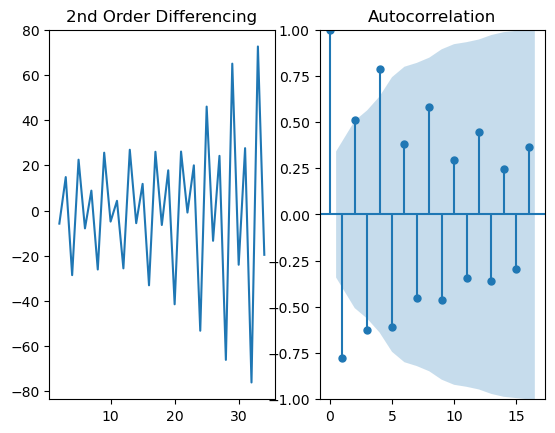

In [5]:
#Попробуем проверить с d = 1
import matplotlib.pyplot as plt
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(), ax = ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

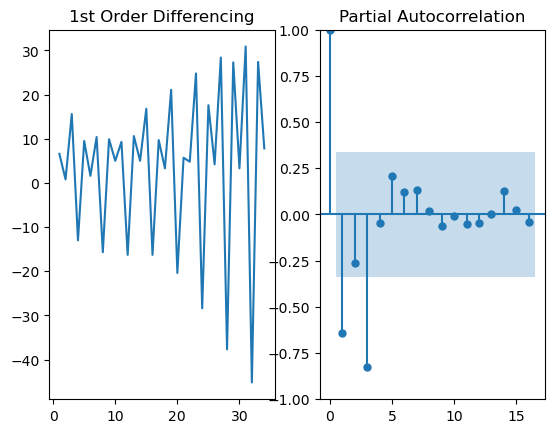

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax = ax2, method = 'ywm')
plt.show

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# msk = (df.index < len(df)-5)
# df_train = df[msk].copy()
# df_test = df[~msk].copy()

model = ARIMA(df, order=(4,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   35
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -101.580
Date:                Thu, 20 Apr 2023   AIC                            215.159
Time:                        23:03:33   BIC                            224.318
Sample:                             0   HQIC                           218.283
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0374      0.057     -0.661      0.509      -0.148       0.074
ar.L2          0.0041      0.043      0.097      0.923      -0.079       0.088
ar.L3          0.0322      0.052      0.620      0.5

C:\Users\crisc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


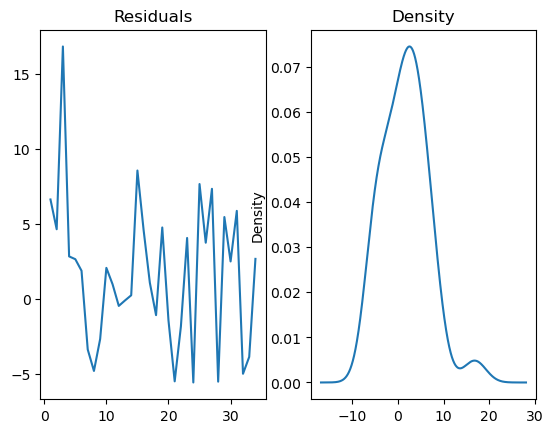

In [8]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\Users\crisc\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


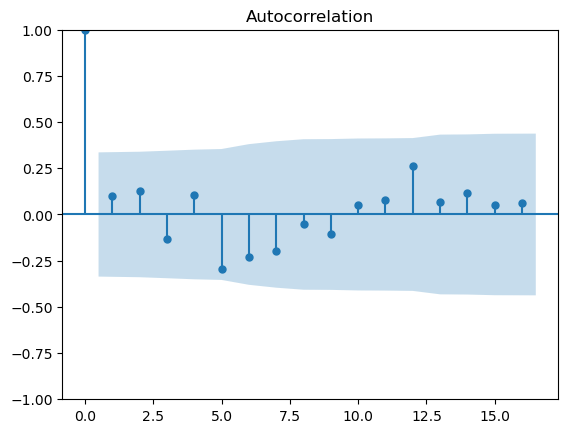

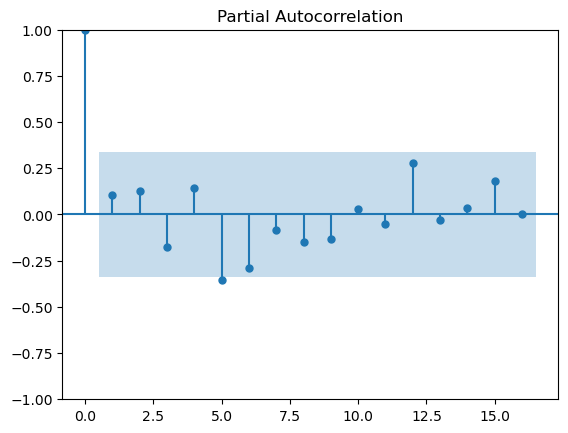

In [9]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

C:\Users\crisc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


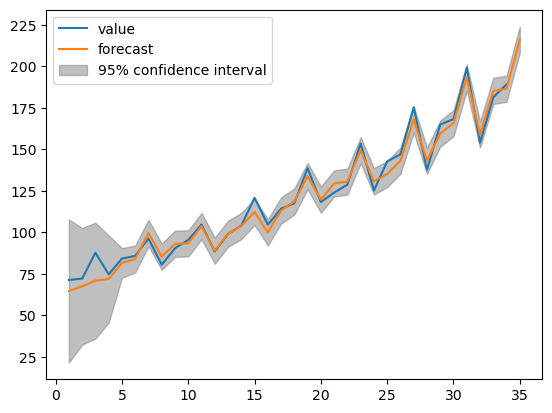

In [10]:
from statsmodels.graphics.tsaplots import plot_predict

model_fit = ARIMA(df, order=(4,1,1)).fit()
fig, ax = plt.subplots()
ax = df.loc[1:].plot(ax=ax)
plot_predict(model_fit, 1, 35, ax=ax)
plt.show()

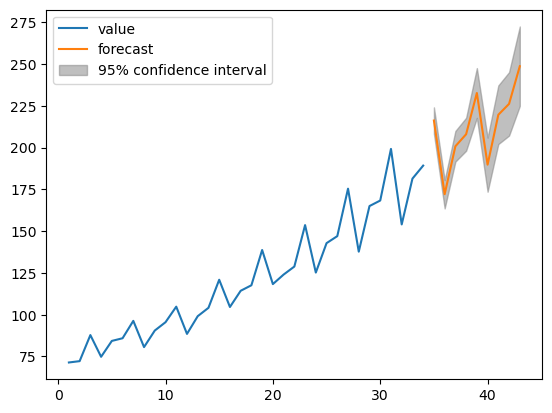

In [11]:
fig, ax = plt.subplots()
ax = df.loc[1:].plot(ax=ax)
plot_predict(model_fit, 35, 43, ax=ax)
plt.show()

In [12]:
df['fit'] = model_fit.predict()
df

,value,fit
0,64.8,0.000000
1,71.4,64.781818
2,72.2,67.564460
3,87.8,70.992116
4,74.8,71.972739
5,84.3,81.659900
6,85.9,84.029308
7,96.3,99.675520
8,80.6,85.402843
9,90.5,93.175182


In [13]:
prediction = model_fit.predict(35, 43)
print(prediction)

35    216.170912
36    172.075352
37    200.761427
38    207.969097
39    232.652276
40    189.756487
41    219.621135
42    226.139283
43    248.664699
Name: predicted_mean, dtype: float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   35 non-null     float64
 1   fit     35 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


In [15]:
# оценка подобранной модели
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from pmdarima.metrics import smape

mae = mean_absolute_error(df['value'], df['fit'])
mape = mean_absolute_percentage_error(df['value'], df['fit'])
rmse = np.sqrt(mean_squared_error(df['value'], df['fit']))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')
print(f"Mean squared error: {mean_squared_error(df['value'], df['fit'])}")
print(f"SMAPE: {smape(df['value'], df['fit'])}")

mae: 5.796177609218061
mape: 0.06336150212745453
rmse: 12.057075198794951
Mean squared error: 145.37306234939632
SMAPE: 9.280871728263952


In [16]:
# автоподбор параметров
import pmdarima as pm
auto_arima = pm.auto_arima(df['value'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [17]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(4, 1, 1)   Log Likelihood                 -99.452
Date:                Thu, 20 Apr 2023   AIC                            212.905
Time:                        23:03:37   BIC                            223.589
Sample:                             0   HQIC                           216.548
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0170      2.780      0.726      0.468      -3.432       7.466
ar.L1         -0.1785      0.224     -0.796      0.426      -0.618       0.261
ar.L2         -0.1359      0.205     -0.663      0.507      -0.538       0.266
ar.L3         -0.1007      0.181     -0.556      0.578      -0.456       0.254
ar.L4          0.8414      0.186      4.529      0.000       0.477       1.206
ma.L1         -0.4433      0.376     -1.180      0.238      -1.180       0.293
sigma2        15.2457      6.284      2.426      0.015       2.929      27.563
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.71   Prob(JB):                         0.43
Heteroskedasticity (H):               3.57   Skew:                             0.23
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# автоподбор параметров для SARIMAX
import pmdarima as pm
auto_arima = pm.auto_arima(df['value'], stepwise=False, seasonal=True, m = 4)
auto_arima

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 4),
      suppress_warnings=True, with_intercept=False)

In [19]:
# AIC & BIC меньше подобранной выше модели
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   35
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 -80.565
Date:                           Thu, 20 Apr 2023   AIC                            169.130
Time:                                   23:03:44   BIC                            174.735
Sample:                                        0   HQIC                           170.923
                                            - 35                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4972      0.396      1.255      0.209      -0.279       1.274
ma.L1         -0.8911      0.261     -3.418      0.001      -1.402      -0.380
ma.S.L4        0.7058      0.366      1.930      0.054      -0.011       1.422
sigma2        11.4748      2.447      4.690      0.000       6.679      16.270
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                17.97
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               4.96   Skew:                             1.21
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""